In [2]:
import findspark
findspark.init()

import pandas as pd
import pyspark
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from pyspark.sql import SparkSession

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.functions import broadcast
from pyspark.sql.types import *
from pyspark.sql.functions import mean

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Df')\
        .getOrCreate()

In [4]:
spf = spark.read.csv("stocks_price_final.csv", header=True, inferSchema=True)

## Visualiza los datos
spf.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|       54|       58|       51|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|       56|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [5]:
#Eliminar o renombrar la variable market.cap  
spf1= spf.drop("market.cap")

spf1.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|       54|       58|       51|    52.75|7326300|    52.75|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|       56|52.009998|55.200001| 269900|55.200001|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.27|55.650002|       62|1589600|       62|Capital Goods|Biotechnology: La...|  

In [6]:
#Filtrar los datos donde el valor de “open” es nulo y eliminar esas filas 
spf2 = spf1.filter(col("open").isNotNull())
spf2.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|       54|       58|       51|    52.75|7326300|    52.75|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|       56|52.009998|55.200001| 269900|55.200001|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.27|55.650002|       62|1589600|       62|Capital Goods|Biotechnology: La...|  

In [7]:
#Calcular el mínimo y máximo de data, open, close y adjusted 
spf2.describe('date','open','close','adjusted').show()

+-------+------------------+------------------+------------------+
|summary|              open|             close|          adjusted|
+-------+------------------+------------------+------------------+
|  count|           1729034|           1729034|           1729034|
|   mean|15070.071703341047| 15032.71485433071|14926.109688795501|
| stddev|1111821.8002863121|1109755.9294000654|1101877.6328940047|
|    min|             0.072|             0.071|         -0.388907|
|    max|                NA|                NA|                NA|
+-------+------------------+------------------+------------------+



In [8]:
pandasspf = spf1.toPandas()
pandasspf

,_c0,symbol,date,open,high,low,close,volume,adjusted,sector,industry,exchange
0,1,TXG,2019-09-12,54,58,51,52.75,7326300,52.75,Capital Goods,Biotechnology: Laboratory Analytical Instruments,NASDAQ
1,2,TXG,2019-09-13,52.75,54.355,49.150002,52.27,1025200,52.27,Capital Goods,Biotechnology: Laboratory Analytical Instruments,NASDAQ
2,3,TXG,2019-09-16,52.450001,56,52.009998,55.200001,269900,55.200001,Capital Goods,Biotechnology: Laboratory Analytical Instruments,NASDAQ
3,4,TXG,2019-09-17,56.209999,60.900002,55.423,56.779999,602800,56.779999,Capital Goods,Biotechnology: Laboratory Analytical Instruments,NASDAQ
4,5,TXG,2019-09-18,56.849998,62.27,55.650002,62,1589600,62,Capital Goods,Biotechnology: Laboratory Analytical Instruments,NASDAQ
...,...,...,...,...,...,...,...,...,...,...,...,...
1729029,1729030,ZYME,2020-07-16,30.57,31.67,30.299999,31.15,467900,31.15,Health Care,Major Pharmaceuticals,NYSE
1729030,1729031,ZYME,2020-07-17,31.200001,33.080002,31,33.029999,600800,33.029999,Health Care,Major Pharmaceuticals,NYSE
1729031,1729032,ZYME,2020-07-20,33.32,33.32,31.589001,32.110001,303500,32.110001,Health Care,Major Pharmaceuticals,NYSE
1729032,1729033,ZYME,2020-07-21,32.369999,32.490002,30.34,30.65,337900,30.65,Health Care,Major Pharmaceuticals,NYSE


In [9]:
#Calcular la media de las variables open, close y adjusted por industria 
pandasspf['open'] = pd.to_numeric(pandasspf['open'], errors='coerce')

pandasspf['close'] = pd.to_numeric(pandasspf['close'], errors='coerce')

pandasspf['adjusted'] = pd.to_numeric(pandasspf['adjusted'], errors='coerce')

In [10]:
media_por_industria = pandasspf.groupby('industry')[['open', 'close', 'adjusted']].mean(numeric_only=True)

media_por_industria

,open,close,adjusted
industry,,,
Accident &Health Insurance,32.051694,32.050321,31.237062
Advertising,15.772742,15.760318,15.337851
Aerospace,81.431188,81.380611,80.432628
Agricultural Chemicals,22.046414,22.042051,21.635093
Air Freight/Delivery Services,45.764322,45.698841,45.323198
...,...,...,...
Tools/Hardware,70.412755,70.475944,69.670351
Transportation Services,140.937806,140.917862,140.768352
Trucking Freight/Courier Services,42.781825,42.816390,42.263292


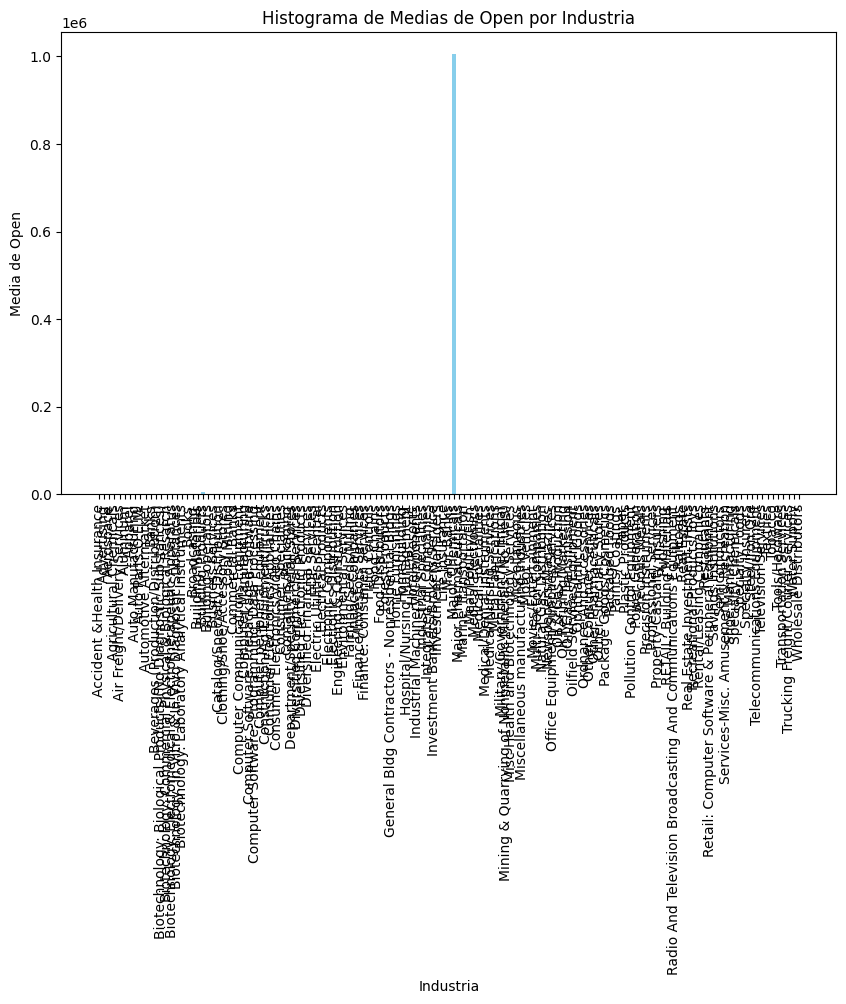

In [11]:
plt.figure(figsize=(10, 6))
industrias = media_por_industria.index
medias_open = media_por_industria['open']
plt.bar(industrias, medias_open, color='skyblue')
plt.xlabel('Industria')
plt.ylabel('Media de Open')
plt.title('Histograma de Medias de Open por Industria')  # Título del gráfico
plt.xticks(rotation=90)
plt.show()

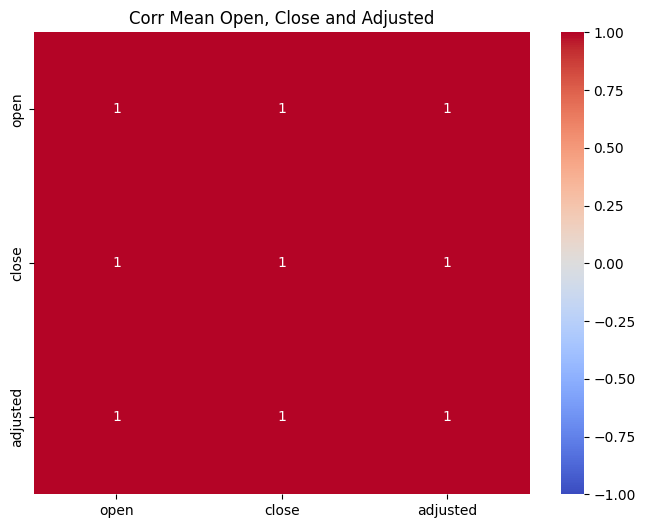

In [12]:
#Generar un heatmap con seaborn donde se muestre la correlación entre las medias de open, close y adjusted
correlation_matrix = media_por_industria[['open', 'close', 'adjusted']].corr()
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Corr Mean Open, Close and Adjusted')
plt.show()

In [13]:
import pyarrow as pa
import pyarrow.parquet as pq

In [14]:
seleccion = pandasspf[['symbol', 'date', 'open', 'high', 'low', 'close', 'adjusted', 'sector', 'industry', 'exchange']]
tabla = pa.Table.from_pandas(seleccion)
pq.write_table(tabla, 'seleccion_datos.parquet')